In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pydicom as dicom

In [4]:
import PIL
from PIL import Image

In [5]:
import os

In [6]:
import cv2

In [18]:
from functions import *

In [9]:
path = 'D:\\Daria\\uni\\MS\\'

In [226]:
no = '01_66'

In [232]:
f = '\\png\\IM000012.png'

In [233]:
img = cv2.imread(path + no + f,3) #read img
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grayscale

In [142]:
ret, thresh = cv2.threshold(gray,0,70,cv2.THRESH_OTSU)
ret, markers = cv2.connectedComponents(thresh)

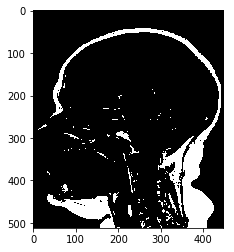

In [143]:
view(thresh)

In [144]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

In [136]:
# plt.plot(cdf_normalized, color = 'b')
# plt.hist(check.flatten(),256,[0,256], color = 'r')
# plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
# plt.show()

In [145]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [89]:
# img2 = cdf[gray]

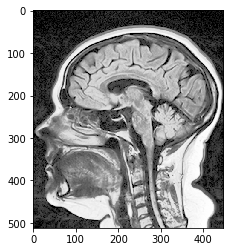

In [90]:
# view(img2)

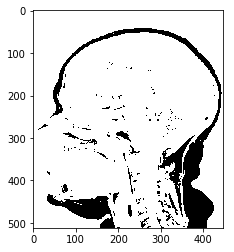

In [91]:
# mask_0 = img2 < 220
# view(mask_0)

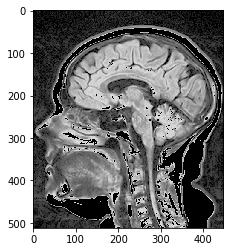

In [92]:
# nofat = applymask(cdf[img], mask_0)
# view(nofat)

In [146]:
gray = cv2.cvtColor(cdf[img], cv2.COLOR_BGR2GRAY)

In [147]:
ret, thresh = cv2.threshold(gray,0,210,cv2.THRESH_OTSU)
ret, markers = cv2.connectedComponents(thresh)

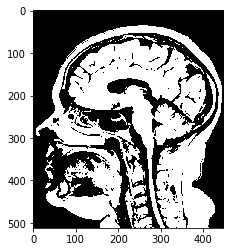

In [148]:
view(thresh)

In [164]:
marker_area = [np.sum(markers == m) for m in range(np.max(markers)) if m != 0] 

In [165]:
largest_component = np.argmax(marker_area) + 1 #Add 1 since we dropped zero above                        

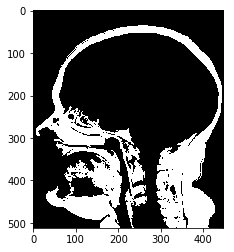

In [166]:
brain_mask = markers == largest_component
view(brain_mask)

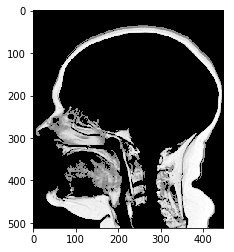

In [167]:
check = applymask(cdf[img], brain_mask)
view(check)

In [168]:
# hist,bins = np.histogram(check.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * hist.max()/ cdf.max()

In [169]:
graycheck = cv2.cvtColor(check, cv2.COLOR_BGR2GRAY)

In [170]:
graycheck.max()

255

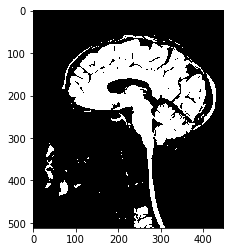

In [175]:
if graycheck.max() > 250:
    newmask =  ~brain_mask
newnew = thresh.copy()
newnew[newmask == False] = 0
view(newnew)

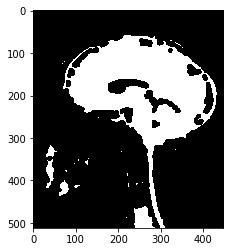

In [178]:
closing = close(newnew, 10)
view(closing)

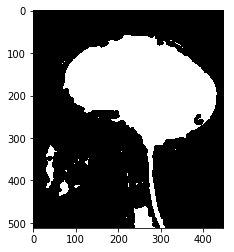

In [179]:
fill = floodfill(closing)
view(fill)

In [180]:
clean = remgar(fill)

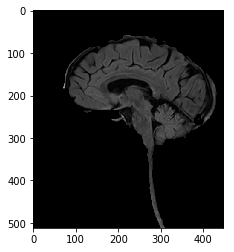

In [181]:
brain = applymask(img, clean)
view(brain)

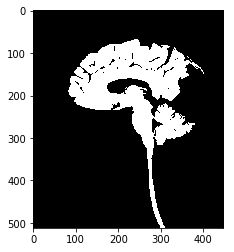

In [182]:
tr = remgar(newnew)
view(tr)

In [184]:
from stripthem import *

In [185]:
result, mask = strip_one(img)

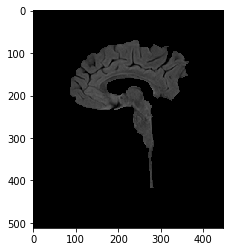

In [186]:
view(result)

In [234]:
def strip_one1(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    gray = cv2.cvtColor(cdf[img], cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,210,cv2.THRESH_OTSU)
    ret, markers = cv2.connectedComponents(thresh)
    marker_area = [np.sum(markers == m) for m in range(np.max(markers)) if m != 0] 
    largest_component = np.argmax(marker_area) + 1              
    brain_mask = markers == largest_component
    check = applymask(cdf[img], brain_mask)
    graycheck = cv2.cvtColor(check, cv2.COLOR_BGR2GRAY)
    print(graycheck.mean())
    newnew = thresh.copy()
    if graycheck.mean() > 50:
        print("yes")
        newmask =  ~brain_mask
        newnew[newmask == False] = 0
        closing = close(newnew,10)
        fill = floodfill(closing)
        exp = remgar(fill)
        exp = close(exp, 10)
        exp = floodfill(exp)
    else:
        #exp = applymask(img, mask_0)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
        brain_mask = remgar(thresh)
        brain_mask = np.uint8(brain_mask)
        clean = tophat(brain_mask, kernel(10))
        ker = np.ones((3,3), np.uint8) 
        erosion = cv2.erode(clean, ker, iterations=1) 
        closing_2 = close(erosion, 3)
        closing_2 = np.uint8(closing_2)
        mask_2 = floodfill(closing_2)
        exp = remgar(mask_2)
        exp = close(exp, 10)
        exp = floodfill(exp)
    segm = applymask(img, exp)
    return segm, exp

In [235]:
res1, msk1 = strip_one1(img)

52.454293387276785
yes


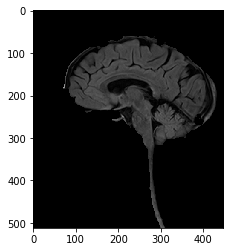

In [236]:
view(res1)

In [231]:
graycheck.mean()

52.454293387276785